In [ ]:



!pip install --upgrade vaderSentiment


In [ ]:
import pandas as pd #need pandas for pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#need the us eelctions csv
df = pd.read_csv("../data/USAelection2024tweets.csv")

#need the object analyzer which is used throughout
analyzer = SentimentIntensityAnalyzer()

In [ ]:
#had issues with tpes so using fillna for missing tweets
df['tweet_text'] = df['tweet_text'].fillna("")



#actually getting the score for the tweets
vader_scores = df['tweet_text'].apply(analyzer.polarity_scores)
vader_df = pd.DataFrame(list(vader_scores)) #initially holding just results

#making the dataframe to hold the results and initial df
df_vaderElection = pd.concat([df, vader_df], axis=1)

#functin to classify each tweet
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df_vaderElection['vader_sentiment'] = df_vaderElection['compound'].apply(classify_sentiment)

#testing to make sure the results are as expected
print(df_vaderElection[['tweet_text', 'compound', 'vader_sentiment']].head(10))

                                          tweet_text  compound vader_sentiment
0  Excited to see Kamala Harris leading the Democ...    0.4003        Positive
1  Donald Trump's policies are the best for our e...    0.6369        Positive
2  Jill Stein's environmental plans are exactly w...    0.0000         Neutral
3  Robert Kennedy offers a fresh perspective outs...    0.3182        Positive
4  Chase Oliver's libertarian stance promotes tru...    0.8834        Positive
5  Kamala Harris has been a strong advocate for h...    0.5106        Positive
6  Trump's tax policies will benefit small busine...    0.4588        Positive
7  Jill Stein's green initiatives could save our ...    0.4939        Positive
8  Robert Kennedy is running as an independent; i...    0.4019        Positive
9  Chase Oliver promotes minimal government inter...    0.7840        Positive


In [ ]:


#finding the mean result
average_compound = df_vaderElection['compound'].mean()

#finding the overal sentiment of all tweets in us election with this function
def classify_overall(score):
    if score >= 0.05:
        return 'Overall Positive'
    elif score <= -0.05:
        return 'Overall Negative'
    else:
        return 'Overall Neutral'

overall_sentiment = classify_overall(average_compound)




In [ ]:
#finding average for each cateogry
avgPos = df_vaderElection['pos'].mean()
avgNeu = df_vaderElection['neu'].mean()
avgNeg = df_vaderElection['neg'].mean()

#showing each of the results
print("US Election Results Summary")
print(f"Average Compound Score: {average_compound:.4f}")
print(f"Overall Sentiment: {overall_sentiment}")
print(f"average Positive Score: {avgPos:.4f}")
print(f"Average Neutral Score:  {avgNeu:.4f}")
print(f"Average Negative Score: {avgNeg:.4f}")

US Election Results Summary
Average Compound Score: 0.2290
Overall Sentiment: Overall Positive
average Positive Score: 0.1811
Average Neutral Score:  0.7953
Average Negative Score: 0.0236


<ipython-input-6-75c4a625851f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


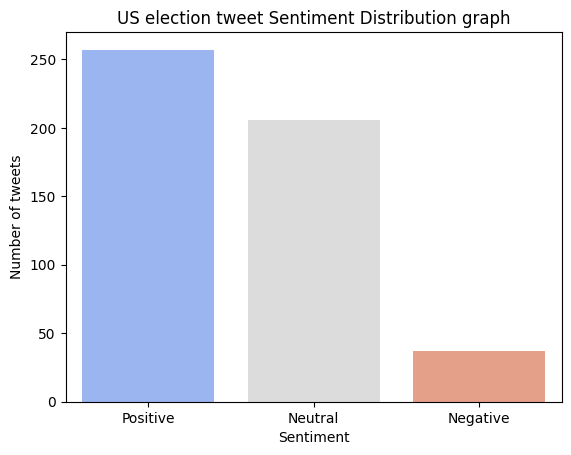

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#see how much of each cateogry there is
sentiment_counts = df_vaderElection['vader_sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'])

#visualize the totals
sns.barplot(x = sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('US election tweet Sentiment Distribution graph')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()


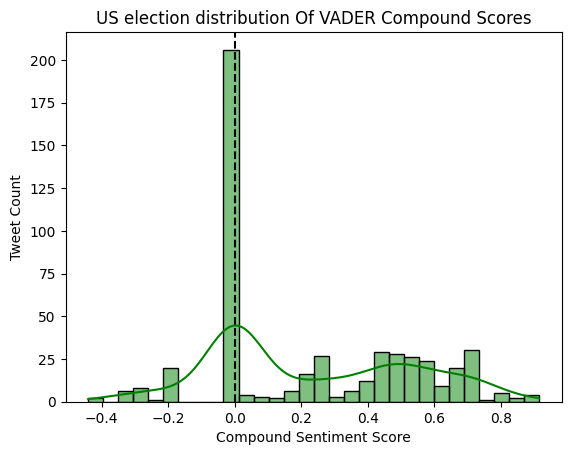

In [ ]:
#seeing the prevalence of each score
sns.histplot(df_vaderElection['compound'], bins = 30, kde = True, color='green')
plt.title('US election distribution Of VADER Compound Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Tweet Count')
plt.axvline(0, color = 'black', linestyle='--')
plt.show()

In [ ]:
df_vaderElection['timestamp'] = pd.to_datetime(df_vaderElection['timestamp'])

#get data
df_vaderElection['date'] = df_vaderElection['timestamp'].dt.date

#get average sentiment by day
daily_sentiment = df_vaderElection.groupby('date')['compound'].mean().reset_index()#reset index to make date just a column not index





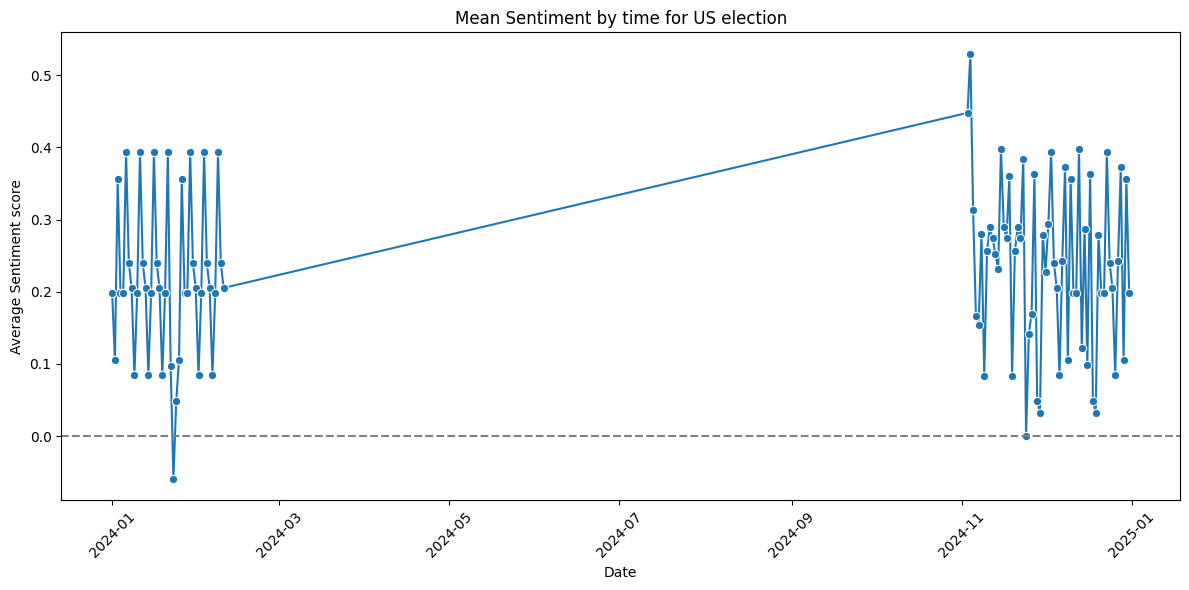

In [ ]:
#seeing the sentiment over time
plt.figure(figsize = (12, 6))
sns.lineplot(data = daily_sentiment, x = 'date', y = 'compound', marker = 'o')
plt.axhline(0, color = 'gray', linestyle='--')
plt.title('Mean Sentiment by time for US election')
plt.xlabel('Date')
plt.ylabel('Average Sentiment score')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
